# Task 1 and Task 2
This notebooks answers task 1 and task 2 of the assignment

## Task 1 Analyze distances between images 
The purpose of this task is to develop some intuitions about clouds of points in highlydimensional spaces.  In particular, you are supposed to develop a very simple algorithm forclassifying hand-written digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.metrics.pairwise import pairwise_distances as pairdist
import warnings
from sklearn.exceptions import DataConversionWarning

In [2]:
def select_user():
    
    """
    
    To avoid copypasting the directory path every time
    
    """
    global root_path
    
    user = input('Choose root path (l or a, e to exit): ')
    if user == 'l':
        print('User: Lindsey')
        root_path = root_path_L
    elif user == 'a':
        print('User: Alberto')
        root_path = root_path_A
    elif user == 'e':
        sys.exit('No user selected')
    else:
        print('Please type l or a, e to exit')
        select_user()

In [3]:
root_path_L = '/Users/obe-won/Desktop/NN'
root_path_A = '/Users/Alberto/Documents/Università/Leiden/DLNN/assignment 1'
root_path = ''

select_user()

#Import the test and training data
test_in = np.loadtxt(root_path + '/data/test_in.csv', delimiter=',')
test_out = np.loadtxt(root_path + '/data/test_out.csv', delimiter=',', dtype=int)
train_in = np.loadtxt(root_path + '/data/train_in.csv', delimiter=',')
train_out = np.loadtxt(root_path + '/data/train_out.csv', delimiter=',', dtype=int)

number_train = [len(train_out[np.where(train_out == i)]) for i in range(10)]
number_test = [len(test_out[np.where(test_out == i)]) for i in range(10)]

Choose root path (l or a, e to exit): l
User: Lindsey


The centers are just the 256-dimensional vector of means over all the coordinates of vectors that belong to each image
There are pixel values from 0 to 255 and they need to be normalized to values that range from -0.5 to 0.5 to make the network easier to train. This classifier will be using Euclidean distances as the distances that is calculated by 
<math>\begin{align}d(\mathbf{x},\mathbf{y}) & = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + \cdots + (x_n-y_n)^2} \\[8pt]
& = \sqrt{\sum_{i=1}^n (x_i-y_i)^2}.\end{align}</math>

In [4]:
def Distance(x, y, met='euclidean'):
    
    """
    This function rescales the argument arrays within 
    the (-0.5, 0.5) range and calculates the Euclidian 
    distance between two vectors x and y
    
    Inputs: 
        x, y: (i.e the 1-dimensional vectors)
    Outputs:
        dist: distance computed with pairdist
        np.sqrt(dist_eucl): Euclidian distance (for debug purposes)
        
    """ 
    
    #res_x = np.interp(x, (-1, 1), (-0.5, +0.5))
    #res_y = np.interp(y, (-1, 1), (-0.5, +0.5))
    
    dist_eucl = 0
    for i in range(len(x)):
        dist_eucl += (x[i] - y[i])**2.
    
    new_x = np.reshape(x, (1, -1))
    new_y = np.reshape(y, (1, -1))
    
    dist = pairdist(new_x, Y=new_y, metric=met)
    
    return dist, np.sqrt(dist_eucl)

In [5]:
def Calculate_Center_Radius(data_in, data_out, n, met='euclidean'):
    
    """
    Calculate the maximum distance of points from the center for every cloud
    
    Inputs: 
        data_input: all of the images, 
        data_out: the labels of all images, 
        n: list of numbers of pictures for each digit
    Outputs:
        radii: array of length 10 of the maximum distance from center for each digit 
        centers: a 256x10-matrix where each ith column contains the average 256-vector for digit i
        
    """
    #Get the centers for each of the digits 
    centers = [np.mean(data_in[np.where(data_out == i)], axis=0) for i in range(10)]
    
    radii = np.zeros(10)
    
    for i in range(10):
        for j in range(n[i]):
            temp, temp_eucl = Distance(centers[i], data_in[np.where(data_out == i)][j], met=met)
            if temp > radii[i]:
                #print('Found higher radius for digit %d: {}'.format(temp) %i)
                #print('Difference between distances: {}'.format(temp) + ', {}'.format(temp_eucl))
                radii[i] = temp
    return radii, centers

Radius per digit: [ 15.89293034   9.48136346  14.16875359  14.74475895  14.53352217
  14.45195133  14.03151782  14.90896865  13.70578192  16.13869602]


/Users/obe-won/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


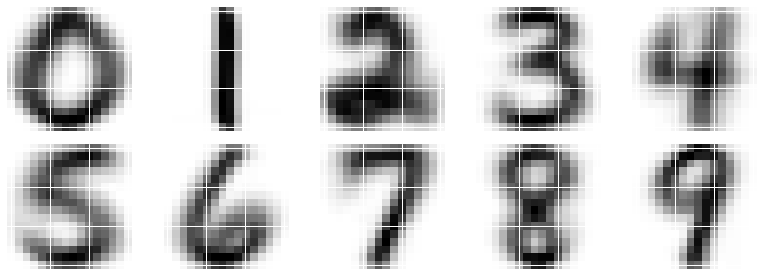

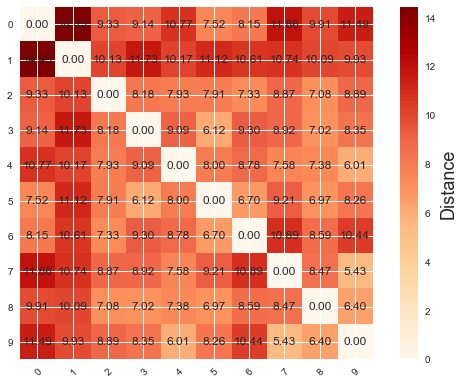

In [6]:
def task1(met='euclidean'):
    
    """
    This function performs all the calculations of the number of pictures
    per digit, the radius, center distances. It prints out the results and
    displays the distance matrix of the centers.
    
    """
    
    #Make an array of the number of pictures for each digit
    radii, centers = Calculate_Center_Radius(train_in, train_out, number_train, met=met)

    #Need to normalize the radius to the number of images
    #normalized_radius = radius / number_train
    center_mat = pairdist(centers, Y=centers, metric=met)

    #np.savetxt(root_path + '/log/train_radii_' + met + '.txt', radii, delimiter=',')
    #np.savetxt(root_path + '/log/train_centers_' + met + '.txt', centers, delimiter=','
  
    print("Radius per digit: {}".format(radii))
    
    fig, ax = plt.subplots(2,5, figsize=(12,4), tight_layout=True)
    for i, center in enumerate(centers):
        ax[i//5,i%5].imshow(center.reshape(16,16), cmap='binary')
        ax[i//5,i%5].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i//5,i%5].yaxis.set_major_formatter(plt.NullFormatter())
        
    plt.savefig("centers_clouds.png")
    plt.show()
    plt.clf()
    
    
    plt.figure(figsize=(10,10.5))
   
    fig1, ax1 = plt.subplots()
    im = ax1.imshow(center_mat, cmap = 'OrRd')

    # We want to show all ticks...
    ax1.set_xticks(np.arange(10))
    ax1.set_yticks(np.arange(10))
    # ... and label them with the respective list entries
   
    ax1.set_xticklabels(np.arange(10))
    ax1.set_yticklabels(np.arange(10))

    # Rotate the tick labels and set their alignment.
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(0,10):
        for j in range(0,10):
            text = ax1.text(j, i, '%.2f' % center_mat[i, j], ha="center", va="center")
            
    cl = fig1.colorbar(im)     
    cl.set_label('Distance', fontsize = '18')
    fig1.tight_layout()
    fig1.savefig("centerdistance.png")
    plt.show()
    
task1()

## Task 2
The task is to implement a simple distance-based classifier. Then apply it to all training and test data points and calculate a percentage of correctly classified digits. Then produce a confusion matrix for both the training and the test data

In [60]:
def classifier(train=True, met='euclidean'):
    """
    This function classifies the images calculating the distance from each center,
    then finds the smallest one, finally giving the classification.
    
    Inputs:
    train: determines if we are classifying the training or test set. True: training set.
           False: test set. Default is True
    met: string value that determines the metric to calculate the distance.
         Default is euclidean
         
    Outputs:
    dist_array: array with the images classifications and the minimum radius found
    """
    
    #checks if centers and radii log exist
    f_rad = os.path.isfile(root_path + '/log/train_radii_' + met + '.txt')
    f_cent = os.path.isfile(root_path + '/log/train_centers_' + met + '.txt')
    
    #if they exist, loads the data
    if f_rad and f_cent == True:
        print('Loading training set radii and centers, metric = ' + met)
        radii = np.loadtxt(root_path + '/log/train_radii_' + met + '.txt', delimiter=',')
        centers = np.loadtxt(root_path + '/log/train_centers_' + met + '.txt', delimiter=',')
        
    #if not, calls Calculate_Center_Radius to calculate the data
    else:
        print('No ' + met + ' log found, computing radii and centers')
        radii, centers = Calculate_Center_Radius(train_in, train_out, number_train, met=met)
    
    #loads the correct array to classify
    if train == True:
        array_in = train_in
        print('Classifying training set...')
    else:
        print('Classifying test set...')
        array_in = test_in
    
    n_rows, n_col = np.shape(array_in)
    
    #output array with rows = number of images and columns = 2
    dist_array = np.empty((n_rows, 2))
    
    #for cycle over every image
    for img in range(n_rows):
        
        #selects one image
        one_img = array_in[img,:]
        
        #list of distances
        dist_list = []
        
        #for cycle over every digit
        for digit in range(10):
            
            #center corresponding to that digit
            one_center = centers[digit]
            
            #distance between the image and the center
            temp_dist, dump = Distance(one_img, one_center, met=met)
            
            #appends the distance to the list
            dist_list.append(temp_dist)
            
        #the classified digit is the index of the smallest distance in the list
        min_digit = np.argmin(dist_list)
        
        #the corresponding radius
        min_rad = dist_list[min_digit]
        
        #writes the values into the output array
        dist_array[img,:] = min_rad, min_digit
        
    return dist_array

In [61]:
def Accuracy(classification, train=True):
    """
    Inputs:
        fit - predicted value for each image (array)
        data_out - desired value for each image (array)
    This fucntion Calculates percentage of correctly classified digits
    Outputs:
        percentage of correctly classified digits
    """
    
    if train == True:
        array_out = train_out
        print('Computing training set accuracy...')
    else:
        print('Computing test set accuracy...')
        array_out = test_out
    
    return len(np.where(classification[:,1] == array_out)[0])/len(array_out)*100.

In [62]:
def metric_accuracy(train=True):
    
    """
    This function runs through the different distance calculators and presents the 
    accuracy for each one.
    """
    
    #skipping dice, jaccard, kulusinski, mahalanobis, rogerstanimoto, seuclidean

    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

    metric_list = ['euclidean', 'cityblock', 'cosine', 'l1', 'l2', 'manhattan', 
                   'braycurtis', 'canberra', 'chebyshev', 'correlation', 'hamming', 
                   'minkowski', 'russellrao', 'sokalmichener', 
                   'sokalsneath', 'sqeuclidean', 'yule', ]

    for metric in metric_list:
        classifications = classifier(train=train, met=metric) 
        acc = Accuracy(classifications, train=train)
        print('metric: ' + metric + ', Accuracy: {}'.format(acc) + '\n')

In [63]:
metric_accuracy(train=False)

No euclidean log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: euclidean, Accuracy: 80.4

No cityblock log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: cityblock, Accuracy: 72.1

No cosine log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: cosine, Accuracy: 79.9

No l1 log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: l1, Accuracy: 72.1

No l2 log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: l2, Accuracy: 80.4

No manhattan log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: manhattan, Accuracy: 72.1

No braycurtis log found, computing radii and centers
Classifying test set...
Computing test set accuracy...
metric: braycurtis, Accuracy: 68.2

No canberra log found, computing radii

In [72]:
def Confusion_Matrix(data_input, digit_classification, data_labels, n):
    """
    Inputs:
        data_in - all images
        fit - predicted value for each image (vector)
        data_out - desired value for each image (vector)
        n - number of pictures for each digit (10-vector)
        
    This function calculates the confusion matrix where i,jth element contains percentage 
    of digits i classified as j
    
    Outputs:
        confusion_matix - 10x10 confusion matrix
    """
    confusion_matrix = np.empty((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = len(np.where((digit_classification[:,1] != data_labels) &\
                                   (data_labels == i) & (digit_classification[:,1] == j))[0])/n[i]*100.
    return confusion_matrix


In [ ]:
#Run on the training data
classif = classifier(met='euclidean')
print(classif)
confusion_train = Confusion_Matrix(train_in, classif, train_out, number_train) 
plt.clf()
plt.figure(figsize=(10,10))
ax = sns.heatmap(confusion_train, cmap='OrRd', linewidth=1, cbar_kws={'label': 'Percentage Misclassifications'})
ax.figure.axes[-1].yaxis.label.set_size(18)
plt.savefig('training_confusion_matrix.png')
plt.show()

#Run the classifier on the test data 
plt.clf()
classif = classifier(train = 'False', met='euclidean')
confusion_train = Confusion_Matrix(test_in, classif, test_out, number_test) 
plt.figure(figsize=(10,10))
ax = sns.heatmap(confusion_train, cmap='OrRd', linewidth=1, cbar_kws={'label': 'Percentage Misclassifications'})
ax.figure.axes[-1].yaxis.label.set_size(18)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=20)
plt.savefig('testing_confusion_matrix.png')
plt.show()